###### Problem Set 1, due January 10th at 5:30pm 


###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download IMT574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [3]:
# #IPython is what you are using now to run the notebook
# import IPython
# print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
#print("Numpy version:        %6.6s (need at least 1.7.1)") % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
#print("SciPy version:        %6.6s (need at least 0.12.0)") % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
#print("Pandas version:       %6.6s (need at least 0.11.0)") % pd.__version__

# Module for plotting
import matplotlib
#print("Mapltolib version:    %6.6s (need at least 1.2.1)") % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
#print("Scikit-Learn version: %6.6s (need at least 0.13.1)") % sklearn.__version__

##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [5]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
flights_df=pd.read_csv(filename)

In [5]:
print(flights_df.shape) #dimensions
print(flights_df.columns) #column names

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')


In [6]:
print(flights_df.dtypes)


Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [7]:
a = flights_df.dest.unique() #all unique values in the "dest" column
print(a)
flights_df.head(5)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [8]:
# Your code here
flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1.shape[0]
#flights_df1.dtypes

#print(len(flights_df1.flight))

3923

there were 3923 flights from NYC to Seattle.

(b) How many airlines fly from NYC to Seattle?

In [9]:
flights_df1=flights_df[flights_df.dest=='SEA']
print(len(flights_df1.carrier.unique()))
print(flights_df1.carrier.unique())

5
['AS' 'DL' 'UA' 'B6' 'AA']


There are 5 airlines that fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [10]:
# Your code here
print(len(flights_df1.tailnum.unique()))

936


There are 936 tail numbers

(d) What is the average arrival delay for flights from NC to Seattle?

In [11]:
# Your code here
#flights_df1['arr_delay'].mean()

print(flights_df1.arr_delay.mean())

-1.0990990990990992


The flights arrive almost one minute earlier on an average.

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [13]:
# Your code here
nyc_airports = flights_df1.origin.unique()
print("The airports in New York City with Flights to Seattle are:",nyc_airports)
prop_EWR = len(flights_df1[flights_df1.origin=='EWR'])/len(flights_df1.flight)
print("Propertion of flights from EWR to SEA:",prop_EWR)
print("Proportion of flights from JFK to SEA:", 1-prop_EWR)

# find unique origins
#nyc_origins = flights_df1['origin'].unique()
print(nyc_origins)

# d = {'col1': nyc_origins, 'col2': nyc_origins}
# print(d)

# for i in range(0, len(nyc_origins)):
#                print(nyc_origins[i])

# # a = flights_df1['origin' == ].count()
# # b = 


The airports in New York City with Flights to Seattle are: ['EWR' 'JFK']
Propertion of flights from EWR to SEA: 0.46673464185572267
Proportion of flights from JFK to SEA: 0.5332653581442773
['EWR' 'JFK']


There are 2 airports in New York City. They areL EWR (Newark Liberty International Airport) and JFK (John F. Kennedy International Airport)
Of all the flights that fly to Seattle, aroudn 47% of them are from EWR whereas 53% are from JFK 

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [14]:
flights_df3 = pd.DataFrame() #create a new empty data frame

#filter only useful columns into new data frame
flights_df3 = flights_df.filter(['year','month','day','flight','dep_delay','arr_delay'], axis=1) 

#create a new column called date that stores the full date as a string
flights_df3['Date'] = flights_df3['day'].astype(str) + '-' + flights_df3['month'].astype(str) + '-' + flights_df3['year'].astype(str)

#drop the unnecessary column and store it back into the same DF
flights_df3 = flights_df3.drop(['day','month','year'], axis=1)

#create a new DataFrameGroupBy object with the prev DF grouped by Date
avg_by_date = pd.DataFrame(flights_df3.groupby('Date').mean())

#sort the new object by the mean dep_delay and report the top 1
print("The date with the highest average departure delay is:",avg_by_date.sort_values(by='dep_delay', ascending=False)['dep_delay'].head(1))

#sort the new object by the mean arr_delay and report the top 1
print("The date with the highest average arrival delay is:",avg_by_date.sort_values(by='arr_delay', ascending=False)['arr_delay'].head(1))


The date with the highest average departure delay is: Date
8-3-2013    83.536921
Name: dep_delay, dtype: float64
The date with the highest average arrival delay is: Date
8-3-2013    85.862155
Name: arr_delay, dtype: float64


The date with the highest average departure delay is 8th March 2013 with an average departure delay of 83.53 mins.
The date with the highest average arrival delay is 8th March 2013 with an average arrival delay of 85.86 mins.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [28]:
flights_df['Date'] = flights_df['day'].astype(str) + '-' + flights_df['month'].astype(str) + '-' + flights_df['year'].astype(str)

#select flights with positive departure delay into a new DF
positive_delays = flights_df[flights_df['dep_delay']>0]

#group by each day and count the number of flights
delays_per_day = pd.DataFrame(positive_delays.groupby('Date').count().sort_values(by='dep_delay', ascending=False))

print("The worst day to fly out is:",delays_per_day['flight'].head(1))


The worst day to fly out is: Date
23-12-2013    674
Name: flight, dtype: int64


The worst day to fly out of NYC is 23rd December 2013 (probably because of the holiday season?) with 674 flights being delayed.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

    month  dep_delay
0       1  10.036665
1       2  10.816843
2       3  13.227076
3       4  13.938038
4       5  12.986859
5       6  20.846332
6       7  21.727787
7       8  12.611040
8       9   6.722476
9      10   6.243988
10     11   5.435362
11     12  16.576688


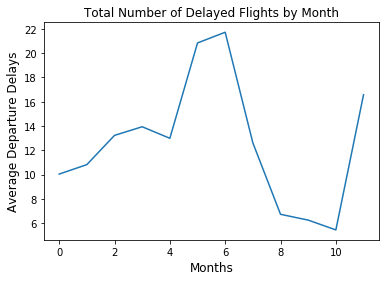

In [16]:
month_depDelay = flights_df.filter(['month','dep_delay'], axis=1) 
month_depDelay = pd.DataFrame(month_depDelay.groupby('month').mean())
month_depDelay = month_depDelay.reset_index()
print(month_depDelay)

plt.plot(month_depDelay['dep_delay'])
plt.xlabel('Months', size = 12)
plt.ylabel('Average Departure Delays', size = 12)
plt.title('Total Number of Delayed Flights by Month')
plt.show()

Here we can see that the average departure delays are highest in June and July. This might probably be because of the summer holidays. More people would be travelling during these months. We are able to see another spike in the Winter towrds December. Again it could be because of the holiday season, higher number of passengers would be traveling.

(d) On average, how do departure delays vary over the course of a day?

    hour   dep_delay
0    0.0  128.642452
1    1.0  207.049327
2    2.0  239.921875
3    3.0  304.727273
4    4.0   -5.554098
5    5.0   -4.355644
6    6.0   -1.520552
7    7.0    0.223289
8    8.0    1.091432
9    9.0    4.268295
10  10.0    5.548644
11  11.0    5.652309
12  12.0    7.601892
13  13.0    9.380639
14  14.0    8.090381
15  15.0   10.682049
16  16.0   13.621150
17  17.0   16.756593
18  18.0   18.664671
19  19.0   21.497342
20  20.0   28.266213
21  21.0   42.064964
22  22.0   68.190042
23  23.0   96.946865
24  24.0   64.862069


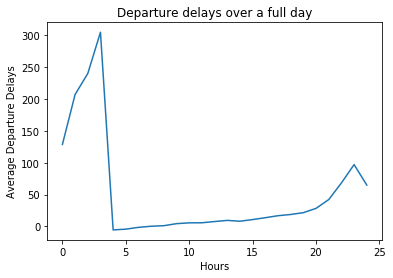

In [17]:
daily_depDelay = flights_df.filter(['hour','dep_delay'], axis=1) #new DF with hours and dep_delay columns
#daily_depDelay = daily_depDelay.dropna(how='all')
daily_depDelay = pd.DataFrame(daily_depDelay.groupby('hour').mean()) #group by the hour and calculate the mean of Dep Delay
daily_depDelay = daily_depDelay.reset_index()

print(daily_depDelay)


#plot
plt.plot(daily_depDelay['dep_delay'])
plt.xlabel('Hours')
plt.ylabel('Average Departure Delays')
plt.title('Departure delays over a full day')
plt.show()


Here we see that the delays peak at 2 different times of the day. One in the early hours of the day. In fact, the departure delays increase steadily from 00:00 to 03:00. This might be because of shortage in airport staff at that time. Again we see the average departure delays increasing from 20:00 all the way till 23:00. This might be because of low visibility conditions at night. 

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [18]:
flights_df['Date'] = flights_df['day'].astype(str) + '-' + flights_df['month'].astype(str) + '-' + flights_df['year'].astype(str)

#calculate speed and store it in a new column "speed". This is in mph
flights_df['speed'] = flights_df['distance']/(flights_df['air_time']/60)

fastest_flight = flights_df.filter(['Date','flight','origin','dest','speed'], axis=1).sort_values(by='speed', ascending=False).head(1)

print("Fastest Flight:")
print(fastest_flight)


Fastest Flight:
             Date  flight origin dest       speed
216447  25-5-2013    1499    LGA  ATL  703.384615


The fastest flight was flight 1499 on 25th of May 2013, which flew at a speed of 703.38 mph from LaGuardia Airport to Hartsfield-Jackson Atlanta International Airport.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [19]:
flights_daily = flights_df.filter(['carrier','flight','dest','Date'], axis=1)
flights_daily.head(10)

#get the number of days each flight flies to each of its respective restinations.
flights_daily = pd.DataFrame(flights_daily.groupby(['carrier','flight','dest'])['Date'].nunique()).reset_index()

#sort it in descending order to get the flights that fly everyday
flights_daily = flights_daily.sort_values(by='Date', ascending=False)

#subset it for the flights that fly on all 365 days
flights_daily = flights_daily[flights_daily.Date==365].reset_index()
flights_daily1 = flights_daily.filter(['carrier','flight','dest'])
print("Flights that fly everyday:")
print(flights_daily1)
print('\n')
#get list of unique destinations
print("Destinations with daily flights from NYC:")
flights_daily['dest'].unique()

Flights that fly everyday:
   carrier  flight dest
0       AA    1611  MIA
1       B6     703  SJU
2       AA    1357  SJU
3       VX     413  LAX
4       B6     219  CLT
5       UA      15  HNL
6       B6     359  BUR
7       B6     371  FLL
8       B6     431  SRQ
9       AA     181  LAX
10      DL    2159  MCO
11      AA     119  LAX
12      VX     407  LAX
13      EV    5712  IAD
14      VX     251  LAS
15      AA      59  SFO
16      B6    1783  MCO
17      DL    2391  TPA


Destinations with daily flights from NYC:


array(['MIA', 'SJU', 'LAX', 'CLT', 'HNL', 'BUR', 'FLL', 'SRQ', 'MCO',
       'IAD', 'LAS', 'SFO', 'TPA'], dtype=object)

18 flights fly everyday to 13 destinations. The destinations are: 
1. MIA (Miami International Airport)
2. SJU (Luis Muñoz Marín International Airport)
3. LAX (Los Angeles International Airport)
4. CLT (Charlotte Douglas International Airport, NC)
5. HNL (Daniel K. Inouye International Airport, Honolulu)
6. BUR (Hollywood Burbank Airport 
7. FLL (Fort Lauderdale-Hollywood International Airport, FL)
8. SRQ (Sarasota-Bradenton International Airport, FL)
9. MCQ (Orlando International Airport)
10. IAD (Dulles International Airport, DC)
11. LAS (McCarran International Airport, Las Vegas)
12. SFO (San Francisco International Airport, CA)
13. TPA (Tampa International Airport, FL)

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


   carrier  dep_delay
6       F9  20.215543
5       EV  19.955390
15      YV  18.996330
7       FL  18.726075
14      WN  17.711744
0       9E  16.725769
3       B6  13.022522
13      VX  12.869421
10      OO  12.586207
11      UA  12.106073
9       MQ  10.552041
4       DL   9.264505
1       AA   8.586016
2       AS   5.804775
8       HA   4.900585
12      US   3.782418


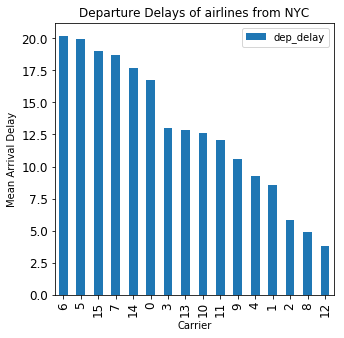

In [59]:
flights_df4 = flights_df.filter(['carrier','dep_delay','arr_delay','air_time','distance'], axis=1)
flights_df4['speed_in_mph'] = flights_df4['distance']/(flights_df4['air_time']/60)
#flights_df4.head(10)
most_delayed_airlines = pd.DataFrame(flights_df4.groupby('carrier').mean()).reset_index()


#check for departure delays for each airline
most_delayed_airlines_departure = most_delayed_airlines.filter(['carrier','dep_delay'], axis=1).sort_values(by='dep_delay', ascending=False)
print(most_delayed_airlines_departure)


#plot the bar chart
most_delayed_airlines_departure.plot(kind='bar', title ="Departure Delays of airlines from NYC",figsize=(5,5),legend=True, fontsize=12)
plt.xlabel('Carrier')
plt.ylabel('Mean Departure Delay')
plt.show()
plt.close()

   carrier  arr_delay
6       F9  21.920705
7       FL  20.115906
5       EV  15.796431
15      YV  15.556985
10      OO  11.931034
9       MQ  10.774733
14      WN   9.649120
3       B6   9.457973
0       9E   7.379669
11      UA   3.558011
12      US   2.129595
13      VX   1.764464
4       DL   1.644341
1       AA   0.364291
8       HA  -6.915205
2       AS  -9.930889


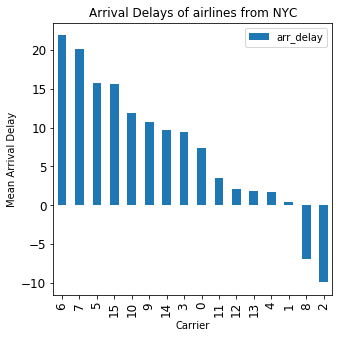

In [62]:
#check for arrival delays for each airline
most_delayed_arrival = most_delayed_airlines.filter(['carrier','arr_delay'], axis=1).sort_values(by='arr_delay', ascending=False)

print(most_delayed_arrival)

#plot the bar chart
most_delayed_arrival.plot(kind='bar', title ="Arrival Delays of airlines from NYC",figsize=(5,5),legend=True, fontsize=12)
plt.xlabel('Carrier')
plt.ylabel('Mean Arrival Delay')
plt.show()
plt.close()


Research Question: Which airline is the most delayed at all NYC airports?

To answer this question, I have explored which carriers have the most average departure and arrival delays.
From the first plot, we can see that carrier F9 (Frontier Airlines) has the highest average departure delay (20 mins). This means that every Frontier airlines flight on an average, departed 20 mins later than its scheduled departure time.  

In the second plot, we can see that carrier F9 (Frontier Airlines) again has the highest arrival delay of about 22 mins. This means that all Frontier airlines flights, on an average arrived 22 mins later than the scheduled arrival time.

Finall we can say that, Frontier is the most delayed airline from NYC in 2013.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [6]:
#load the weather CSV file
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
weather_df=pd.read_csv(filename)


In [8]:
#drop all the rows where hour of departure is NA or NaN
flights_df = flights_df.dropna(subset=['hour'])

#merge weather and flights data on 'origin','year','month','day','hour'
merged_flights_weather = pd.merge(flights_df,weather_df, how = 'left', on = ['origin','year','month','day','hour'])

In [12]:
#drop all rows which dont have any temperature data
merged_flights_weather = merged_flights_weather.dropna(subset=['temp'])

#store this dataframe in a csv
merged_flights_weather.to_csv(r'C:\Users\ashwi\OneDrive\Documents\DS 2 Assignment\mergedDF.csv')

In [30]:
#group by each month to see the relationship of average delay with other weather conditions
merged_flights_weather_group= merged_flights_weather_group.groupby(['month','day'],as_index = False).agg({'dep_delay':'mean','temp':'mean','humid':'mean','visib':'mean','dewp':'mean','wind_dir':'mean','wind_speed':'mean','wind_gust':'mean','precip':'mean','pressure':'mean'})
#merged_flights_weather_group = pd.DataFrame(merged_flights_weather.groupby(['month','day']).mean()).reset_index()
merged_flights_weather_group.head(10)

,month,day,dep_delay,temp,humid,visib,dewp,wind_dir,wind_speed,wind_gust,precip,pressure
0,1,1,17.809365,39.251773,60.857391,10.000000,26.815518,266.856187,12.808682,14.739975,0.0,1012.103876
1,1,2,25.322674,28.109070,48.170145,10.000000,10.857849,307.238372,11.889163,13.681811,0.0,1017.502907
2,1,3,8.450450,29.395135,54.852793,10.000000,14.825405,279.297125,7.671867,8.828631,0.0,1021.213814
3,1,4,12.103858,34.165341,56.021513,10.000000,19.829436,246.735905,14.789401,17.019347,0.0,1017.344807
4,1,5,5.696203,36.880506,48.198017,10.000000,18.827342,281.898734,11.736014,13.505570,0.0,1022.164135
5,1,6,12.383333,39.321800,66.311467,8.823333,28.035800,232.366667,9.213912,10.603185,0.0,1018.178261
6,1,7,9.777778,41.163158,54.448538,10.000000,24.922105,292.192982,9.428320,10.849922,0.0,1024.024269
7,1,8,3.807229,38.261506,65.685602,9.665663,27.116145,208.042169,8.020798,9.230174,0.0,1028.763253
8,1,9,3.131343,40.449791,71.495701,8.623881,31.734030,103.552239,3.613793,4.158680,0.0,1026.600299
9,1,10,5.580175,43.888921,48.158630,10.000000,24.663557,295.393586,10.155717,11.686996,0.0,1030.200292


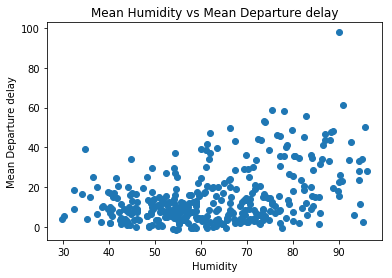

Correlation coeff = 0.40896495977582265


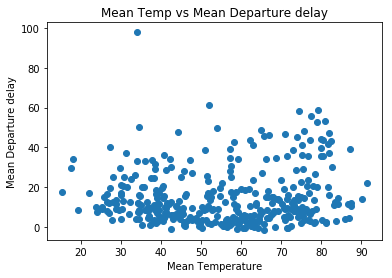

Correlation coeff = 0.09439336061412584


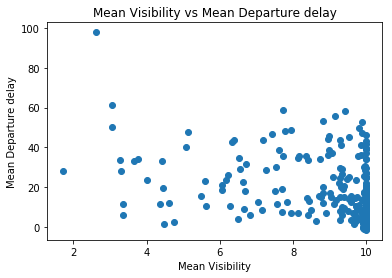

Correlation coeff = -0.41008792779885583


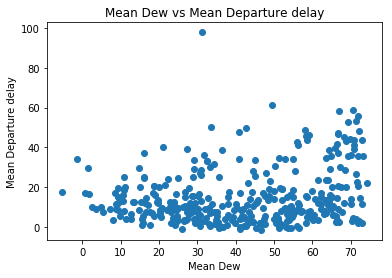

Correlation coeff = 0.21815214525725862


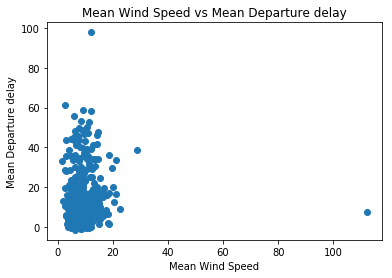

Correlation coeff = 0.01711991983247488


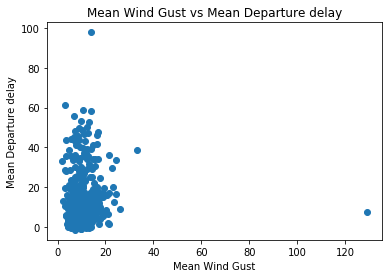

Correlation coeff = 0.017119919832475093


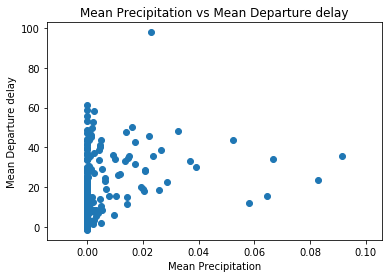

Correlation coeff = 0.3114767521394567


In [40]:
#-----------------plots--------------------------------------

plt.scatter(merged_flights_weather_group['humid'], merged_flights_weather_group['dep_delay'])
plt.xlabel('Humidity')
plt.ylabel('Mean Departure delay')
plt.title('Mean Humidity vs Mean Departure delay')
plt.show()
plt.close()
print("Correlation coeff =",np.corrcoef(merged_flights_weather_group['humid'], merged_flights_weather_group['dep_delay'])[0][1])


plt.scatter(merged_flights_weather_group['temp'], merged_flights_weather_group['dep_delay'])
plt.xlabel('Mean Temperature')
plt.ylabel('Mean Departure delay')
plt.title('Mean Temp vs Mean Departure delay')
plt.show()
plt.close()
print("Correlation coeff =",np.corrcoef(merged_flights_weather_group['temp'], merged_flights_weather_group['dep_delay'])[0][1])

plt.scatter(merged_flights_weather_group['visib'], merged_flights_weather_group['dep_delay'])
plt.xlabel('Mean Visibility')
plt.ylabel('Mean Departure delay')
plt.title('Mean Visibility vs Mean Departure delay')
plt.show()
plt.close()
print("Correlation coeff =",np.corrcoef(merged_flights_weather_group['visib'], merged_flights_weather_group['dep_delay'])[0][1])

plt.scatter(merged_flights_weather_group['dewp'], merged_flights_weather_group['dep_delay'])
plt.xlabel('Mean Dew')
plt.ylabel('Mean Departure delay')
plt.title('Mean Dew vs Mean Departure delay')
plt.show()
plt.close()
print("Correlation coeff =",np.corrcoef(merged_flights_weather_group['dewp'], merged_flights_weather_group['dep_delay'])[0][1])

plt.scatter(merged_flights_weather_group['wind_speed'], merged_flights_weather_group['dep_delay'])
plt.xlabel('Mean Wind Speed')
plt.ylabel('Mean Departure delay')
plt.title('Mean Wind Speed vs Mean Departure delay')
plt.show()
plt.close()
print("Correlation coeff =",np.corrcoef(merged_flights_weather_group['wind_speed'], merged_flights_weather_group['dep_delay'])[0][1])

plt.scatter(merged_flights_weather_group['wind_gust'], merged_flights_weather_group['dep_delay'])
plt.xlabel('Mean Wind Gust')
plt.ylabel('Mean Departure delay')
plt.title('Mean Wind Gust vs Mean Departure delay')
plt.show()
plt.close()
print("Correlation coeff =",np.corrcoef(merged_flights_weather_group['wind_gust'], merged_flights_weather_group['dep_delay'])[0][1])

plt.scatter(merged_flights_weather_group['precip'], merged_flights_weather_group['dep_delay'])
plt.xlabel('Mean Precipitation')
plt.ylabel('Mean Departure delay')
plt.title('Mean Precipitation vs Mean Departure delay')
plt.show()
plt.close()
print("Correlation coeff =",np.corrcoef(merged_flights_weather_group['precip'], merged_flights_weather_group['dep_delay'])[0][1])

Observations:
1. Roughly, delays increase with increase in humidity (correlation: 41%)
2. Temperature does not affect departure delays much
3. We can see that the corr. co-eff of visibility is negative (-0.41). This means that departure delays decrese with increase in visibility
4. Wind speed and wind gust do not cause much delays in departure
5. There is a positive correlation between precipitation and departure delays (corr. coeff = 0.31). This means that delays increase with increase in precipitation as well.